# CVPR Project 2: Detecting Lines and Circles

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for me as I test your code, you may leave them here.


Notes: You must use a photo taken by you containing a few circles and lines, and test your code on that custom file. 
Save the file as final.jpg. I have given a dummpy final.jpg file, that you should replace with your own file. 


## Setup

Both functions you need to implement in this project can be found in student_code.py. Start by implementing hough_lines_vote_acc and then hough_circles_vote_acc. Implement more efficient verison of find_circles for extra credit. 

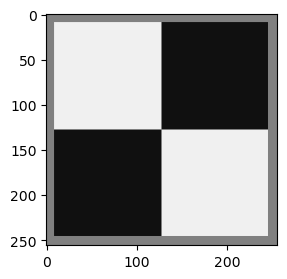

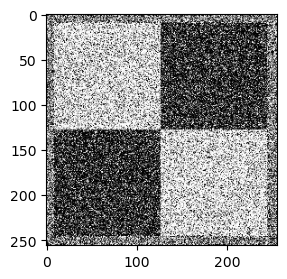

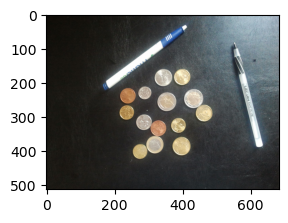

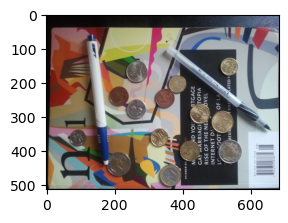

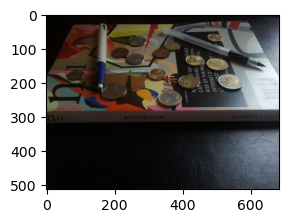

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

%matplotlib inline
from utils import  hough_peaks, hough_lines_draw, hough_circles_draw, preprocess, plotFigure, plotFigureGray
# from student_code

from student_code import hough_lines_vote_acc, hough_circles_vote_acc, find_circles
%load_ext autoreload
%autoreload 2


# load_image loads image as an BGR image.
# The resultant array data-type is 'uint8' numpy array

image0 = cv2.imread('../data/input0.png')
image0noise = cv2.imread('../data/input0-noise.png')
image1 = cv2.imread('../data/input1.png')
image2 = cv2.imread('../data/input2.png')
image3 = cv2.imread('../data/input3.png')


plotFigure(image0)
plotFigure(image0noise)
plotFigure(image1)
plotFigure(image2)
plotFigure(image3)


## Preprocessing. 
Feel Free to play with the arguments. 

In [2]:

edge_img0 = preprocess(image0, 1, 1, 1, 40, 80) 
edge_img0noise = preprocess(image0noise, 1, 1, 1, 800, 800)  
edge_img1 = preprocess(image1, 3, 11, 3, 20, 40)  
edge_img2 = preprocess(image2, 5, 7, 5, 50, 100)  
edge_img3 = preprocess(image3, 6, 7, 5, 20, 40)  

In [3]:
np.unique(edge_img0)

array([  0, 255], dtype=uint8)

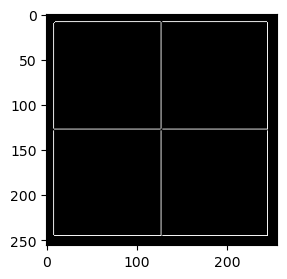

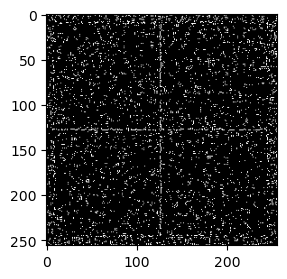

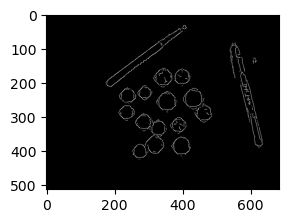

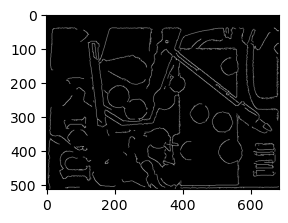

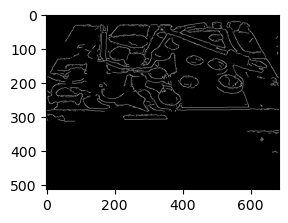

In [4]:
# display the images
plotFigureGray(edge_img0)
plotFigureGray(edge_img0noise)
plotFigureGray(edge_img1)
plotFigureGray(edge_img2)
plotFigureGray(edge_img3)


### Checkerboard Line Detection

In [64]:
start_time = time.time()
H, thetas, rhos = hough_lines_vote_acc(edge_img0)
cv2.imwrite('../results/img0HS.png', H)

# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=100, nhood_size=50)

H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 8, (255,255,255), 1)
cv2.imwrite('../results/img0HSHL.png', H_peaks)

# Draw the detected lines on the image

img_lines= image0.copy()
hough_lines_draw(img_lines, '../results/img0line.png', peaks, rhos, thetas)
print('Time elapsed: %.2f s'%(time.time()-start_time))

Currently inside 'hough_lines_vote_acc'
Currently outside 'hough_lines_vote_acc'
Time elapsed: 2.77 s


### Checkerboard Line Detection (with noise)

In [65]:
start_time = time.time()


H, thetas, rhos = hough_lines_vote_acc(edge_img0noise)
cv2.imwrite('../results/image0noiseHS.png', H)

# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=100, nhood_size=50)
H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 5, (255,255,255), -1)
cv2.imwrite('../results/img0noiseHSHL.png', H_peaks)



# Draw the detected lines on the image

img_lines= image0noise.copy()
hough_lines_draw(img_lines, '../results/img0noiseline.png', peaks, rhos, thetas)
print('Time elapsed: %.2f s'%(time.time()-start_time))

Currently inside 'hough_lines_vote_acc'
Currently outside 'hough_lines_vote_acc'
Time elapsed: 8.41 s


Currently inside 'hough_lines_vote_acc'
Currently outside 'hough_lines_vote_acc'
Time elapsed: 10.94 s


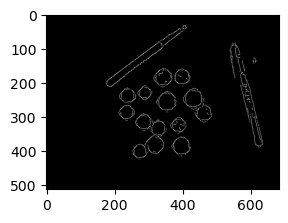

In [66]:
edge_img1 = preprocess(image1, 3, 11, 3, 30, 40)  
plotFigureGray(edge_img1)

start_time = time.time()
H, thetas, rhos = hough_lines_vote_acc(edge_img1)
cv2.imwrite('../results/image1HS.png', H)

# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=100, nhood_size=50)
H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 5, (255,255,255), -1)

cv2.imwrite('../results/img1HSHL.png', H_peaks)


# Draw the detected lines on the image

img_lines= image1.copy()
hough_lines_draw(img_lines, '../results/img1line.png', peaks, rhos, thetas)
print('Time elapsed: %.2f s'%(time.time()-start_time))

## Hough Circle Detector (fixed Radius)


In [67]:
edge_img1 = preprocess(image1, 3, 11, 3, 30, 40)  

start_time = time.time()

# detect circles with radius = 20 and save image
H_20 = hough_circles_vote_acc(edge_img1, 20)
cv2.imwrite('../results/image1CircleHS.png', H_20)

peaks = hough_peaks(H_20, numpeaks=10, threshold=140, nhood_size=100)
img_circles = image1.copy()
img_circles = hough_circles_draw(img_circles, '../results/img1circle20.png', peaks, 20)

print('Time elapsed: %.2f s'%(time.time()-start_time))

Time elapsed: 12.02 s


## Hough Line and Circle Detector (Radius Range)

In [72]:
edge_img1 = preprocess(image1, 3, 11, 3, 20, 40)  
start_time = time.time()


H, thetas, rhos = hough_lines_vote_acc(edge_img1)
# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=10, nhood_size=20)
H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 5, (255,255,255), -1)

centers, radii = find_circles(edge_img1, [15, 40], threshold=108, nhood_size=100)
img_circles = image1.copy()
for i in range(len(radii)):
    img_circles = hough_circles_draw(img_circles, '../results/img1circle20-40.png',
                                     centers[i], radii[i])

# Draw the detected lines on the image
hough_lines_draw(img_circles, '../results/img1lineAndCircle.png', peaks, rhos, thetas)

print('Time elapsed: %.2fs'%(time.time()-start_time))


Currently inside 'hough_lines_vote_acc'
Currently exiting 'hough_lines_vote_acc'
Progress: 0% - Circles: 1
Progress: 4% - Circles: 2
Progress: 8% - Circles: 5
Progress: 12% - Circles: 8
Progress: 16% - Circles: 9
Progress: 20% - Circles: 11
Progress: 24% - Circles: 12
Progress: 28% - Circles: 12
Progress: 32% - Circles: 13
Progress: 36% - Circles: 13
Progress: 40% - Circles: 14
Progress: 44% - Circles: 14
Progress: 48% - Circles: 14
Progress: 52% - Circles: 14
Progress: 56% - Circles: 14
Progress: 60% - Circles: 14
Progress: 64% - Circles: 14
Progress: 68% - Circles: 14
Progress: 72% - Circles: 14
Progress: 76% - Circles: 14
Progress: 80% - Circles: 14
Progress: 84% - Circles: 14
Progress: 88% - Circles: 14
Progress: 92% - Circles: 14
Progress: 96% - Circles: 14
Circles detected: 14          
Time elapsed: 309.99s


### PlayZone. Play with any image of your choice. 

In [5]:
img = cv2.imread('../data/final.jpeg')
img = cv2.resize(img, (500,500), fx=0.1, fy=0.1)

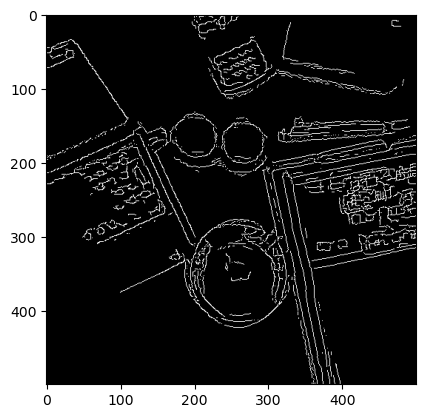

In [6]:
image = preprocess(img, 3, 11, 3, 20, 40)
plt.imshow(image, cmap='gray')

Currently inside 'hough_lines_vote_acc'
Currently exiting 'hough_lines_vote_acc'
Progress: 0% - Circles: 10
Progress: 4% - Circles: 16
Progress: 8% - Circles: 18
Progress: 12% - Circles: 18
Progress: 16% - Circles: 20
Progress: 20% - Circles: 20
Progress: 24% - Circles: 20
Progress: 28% - Circles: 20
Progress: 32% - Circles: 20
Progress: 36% - Circles: 20
Progress: 40% - Circles: 20
Progress: 44% - Circles: 21
Progress: 48% - Circles: 22
Progress: 52% - Circles: 22
Progress: 56% - Circles: 22
Progress: 60% - Circles: 22
Progress: 64% - Circles: 22
Progress: 68% - Circles: 22
Progress: 72% - Circles: 23
Progress: 76% - Circles: 23
Progress: 80% - Circles: 23
Progress: 84% - Circles: 23
Progress: 88% - Circles: 23
Progress: 92% - Circles: 23
Progress: 96% - Circles: 23
Circles detected: 23          
Time elapsed: 572.57


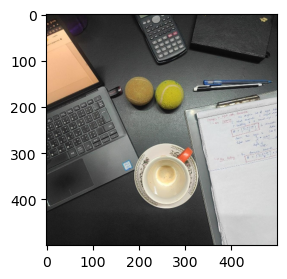

In [7]:
plotFigure(img)

# preprocess(image, erodeK, blurK, blurSigma, lowT, upT)
edge_img = preprocess(img, 3, 11, 3, 20, 40) 
start_time = time.time()


H, thetas, rhos = hough_lines_vote_acc(edge_img)
cv2.imwrite('../results/finalHS.png', H)

# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=100, nhood_size=50)
H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 5, (255,255,255), -1)

centers, radii = find_circles(edge_img, [15, 40], threshold=108, nhood_size=100)
img_circles = img.copy()
for i in range(len(radii)):
    img_circles = hough_circles_draw(img_circles, '../results/finalCircles.png',
                                     centers[i], radii[i])

# Draw the detected lines on the image
hough_lines_draw(img_circles, '../results/finalLinesAndCircles.png', peaks, rhos, thetas)

print('Time elapsed: %.2f'%(time.time()-start_time))

In [8]:
cv2.imwrite('../results/finalEdgeDetected.png', edge_img)

True

In [9]:
cv2.imwrite('../results/finalHSHL.png', H_peaks)

True

In [ ]:
edge_img = preprocess(img, 3, 11, 3, 30, 40)  
plotFigureGray(edge_img)

start_time = time.time()
H, thetas, rhos = hough_lines_vote_acc(edge_img)

# Detect peaks on the hough space of the edge image and highlight them
peaks = hough_peaks(H, numpeaks=10, threshold=100, nhood_size=50)
H_peaks = H.copy()
for peak in peaks:
    cv2.circle(H_peaks, tuple(peak[::-1]), 5, (255,255,255), -1)


img_lines= img.copy()
hough_lines_draw(img_lines, '../results/finalline.png', peaks, rhos, thetas)
print('Time elapsed: %.2f s'%(time.time()-start_time))

Currently inside 'hough_lines_vote_acc'


# THANK YOU